# QTSoc Second Workshop (17/11/2022)
### Presented by - Kuan-Cheng (Louis) Chen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.model_selection import *

from qiskit import *
from qiskit.opflow import *
from qiskit.utils import *
from qiskit.circuit import *
from qiskit.circuit.library import *
from qiskit.algorithms.optimizers import *

from qiskit_machine_learning.neural_networks import *
from qiskit_machine_learning.algorithms.classifiers import *
from qiskit_machine_learning.algorithms.regressors import *
from qiskit_machine_learning.datasets import *

from typing import Union

from qiskit_machine_learning.exceptions import QiskitMachineLearningError

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


![image](https://dim.mcusercontent.com/cs/2872b6d26ba8dd002025da2ec/images/09c230c8-0a04-93ed-add0-25f0f9926c96.jpeg?w=564&dpr=2)

A Neural Network is an ensemble of neurons that acts as a human brain. Its main goal is to detect patterns in order to classify or clusterize the data. We may distinguish between Biological or Artificial Neural Networks. Indeed, we are going to study Artificial Neural Networks (ANNs) being combined with Quantum layers.

But, first of all, let's go step by step an explain a brief description of what a Neural Network is.

A **Neural Network** is a type of a machine learning algorithm. As most of the machine learning algorithms, its main goal is to dettect patterns into the data to be able to classify it (speech recognition or image recognition). It is composed by node layers to perform such a task. Neural Networks are classified into three main different layers: input layer, hidden layers and output layer.

![image](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/neutral-network-diagram.svg)
Each component of the layer, node or artificial neuron, is connected to other and has associated a weight and threshold in this connection. The **weight** is characterizing the importance of the variable into the model and the **threshold** is defining the limit where the neuron will be activated. Meaning that when the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network. In multi-layer neural networks, the *Sigmoid function* is used for that purpose: as an activation function.

We still would require to explain two more features around Neural Networks to have a brief understanding on how a Neural Network works:
1. We will mostly cover **feed-forward neural networks (FFNN)**; meaning that any data that has flown through a neural network, it will never return to a neuron it has already visited. 
2. **Backpropagation**: process that adjust the weights (classical layers) and parameters (quantum layers) of the neurons of the Neural Network in order to minimize a loss/cost function that fits the trainning output with the predicted one. It is usually used the gradient descent method as an optimizer and the __[mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)__ as the loss function.

In case you would like to know deeply how Classical Neural Networks work, please, visit the [Reference](#reference) section.

## Quantum Neural Networks or Variational circuits

A **Quantum Neural Network** is a *parametrized quantum circuit* (or *variational quantum circuit*). It is a parametrized quantum circuit because of the parameter dependent; its optimization relys on it. Thus, a *quantum layer* has a similar behaviour as a classical hidden layer: it receives some input data, it processes that data and, finally, is sent to an output layer.

But, what exactly is a *variational circuit* or *parametrized quantum circuit*? The four main components are: 

1. Preparation of a fixed **initial state** (it is usually used the Hadamards to initialize the ciruit)
2. A **data encoding** quantum circuit, to convert *classical data* into *quantum data* (a feature map with fixed parameters)
3. A **quantum circuit $U(\theta)$** with a trainable parameter $\theta$ (or ansatz)
4. **Measurement of an observable A**

So, a *variational circuit* performs the expectation value of the objective function $f(\theta)=\langle0|U^{\dagger}(\theta)AU^(\theta)|0\rangle$, and a classical optimization algorithm makes queries to the quantum device to get the better solution for $\theta$ parameter/s. Usually, the architecture to build these circuits follows the order above, but, eseentially, it is arbitrary.

To see this in more detail, *parametrized circuits* measure the expectation value of a certain obervable because they mainly follow the __[parameter shift-rule](https://arxiv.org/pdf/1905.13311.pdf)__ to compute the quantum gradient. It is mainly based in the following assumption:

Certain objective function $f(\theta) = \langle\varphi|U_{G}^{\dagger}(\theta) A U_{G}(\theta)|\varphi\rangle$ can be optimized by calculating its derivative as:

$$\frac{df(\theta)}{d\theta} = r\left[f(\theta+\frac{\pi}{4r}) - f(\theta-\frac{\pi}{4r})\right]$$

So, as mentioned above, we now have all steps of a *Quantum Neural Network*:

1. Perform the quantum gradient of a certain observable
2. Output goes to a classical optimization algorithm to train parameter $\theta$
3. Once optimized theta, it comes back to quantum device
4. Quantum gradient is again computed
5. $\theta$ parameter is again trained
6. And so on and so forth till convergence


![image.png](https://www.researchgate.net/publication/337291529/figure/fig2/AS:963471374037013@1606720884248/Schematisation-of-a-variational-quantum-circuit.png)

Hence, Quantum Computing is being inserted as a quantum layer into an **hybrid architecture** to form an **Hybrid Quantum Neural Network (HQNN)**. They can act individually to perform a machine learning model by itself, but hybrid arcitectures are built to improve results during the NISQ era.

Thus, the following images show clearly how a *quantum layer* is integrated into the Hybrid Quantum Neural Network architecture, as well as, how it would be a possible process:

![image.png](https://miro.medium.com/max/1400/1*0CQd-zmKJiWDBeDsH5PslQ.png)

## 2. Quantum Neural Network Classification <a id='classification'></a>

As we have said at the beginning of this Jupyter Notebook, Neural Networks are used to detect patterns into data. Trainning a Neural Network architecture by fitting its weights allows us to classify much quicker than humans can do thanks the current classical computational power.

Because of this, we are going to porpose examples of Neural Network Classification, where the main difference from the previous lesson of *QSVM* is that the optimization is also done by a quantum layer (and not only the creation of the Kernel matrix).

### Let's Code!

Firstly, we are going to define an ad_hoc dataset created randomly where the classification will occurr:

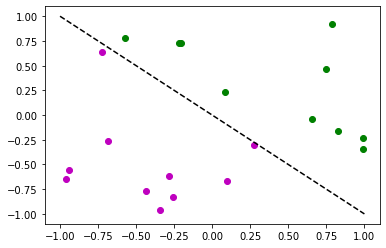

In [2]:
num_inputs = 2
num_samples = 20
X = 2*np.random.rand(num_samples, num_inputs) - 1 # creation of the data points to classify, it will be used the same data points for trainning and testing the data
#print(X)
y01 = 1*(np.sum(X, axis=1) >= 0)  # in { 0,  1}, labelling the above points into classes
#print(y01)
y = 2*y01-1                       # in {-1, +1}, changing labelling/space of the X data points into other
#print(y)
y_one_hot = np.zeros((num_samples, num_inputs)) # starting of one hot encoding
#print(y_one_hot)
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1 # creation of one hot enconding; here associates a hot enconding for 1s or 0s from y01
#print(y_one_hot)

for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], 'go')
    else:
        plt.plot(x[0], x[1], 'mo')
plt.plot([-1, 1], [1, -1], '--', color='black')
plt.show()

### Generic OpflowQNN classification

<div class="alert alert-block alert-info">
<b>Tip:</b> the following models only distinguish between [-1, +1]. Thus, any other classification will not fit correctly.
</div>

We are going to use the generic `OpflowQNN` class to classify this data points. It is always required to define an observable and a parametrized circuit. They are the key elements of the expectation value to be measured (and the way to optimize the variables).

The structure of QML:
![image.png](https://ibm-q4ai.mybluemix.net/img/circuit_infographic_2x.e6d79302.png)

#### Simple observable $(I)$

For that purpose, we construct a parametrized circuit combining a feature map (converting classical data into quantum parametrized data), an ansatz (parametrized circuit) and a simply observable (to perform the expectation value):

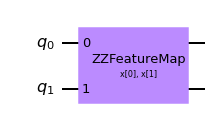

In [3]:
# creating the feature map
feature_map = ZZFeatureMap(feature_dimension=num_inputs, reps=2, entanglement='full')
feature_map.draw('mpl')

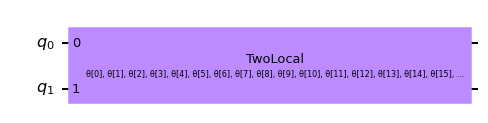

In [4]:
# creating the ansatz
ansatz = TwoLocal(num_qubits=num_inputs, rotation_blocks=['rx', 'ry'], entanglement_blocks='cz', entanglement='full', reps=4)
ansatz.draw('mpl')

In [5]:
# creating the quantum circuit
qcirc = QuantumCircuit(num_inputs)
qcirc.append(feature_map, range(num_inputs))
qcirc.append(ansatz, range(num_inputs))
#qcirc.draw('mpl')
qcirc_op = StateFn(qcirc)

H = StateFn(PauliSumOp.from_list([('I', 1.0)]))

final_op = ~H @ qcirc_op
#print(final_op)

In [14]:
# now, we will generate the neural network with all its components
# translating QuantumCircuit object to Operator object
print(qcirc_op)

# selecting the method to calculate the expectation value
exp_val = AerPauliExpectation()

# selecting the gradient to use
grad = Gradient()
#grad = NaturalGradient()

# defining the QuantumInstance
qi = QuantumInstance(Aer.get_backend('qasm_simulator'))

# defining the Quantum Neural Network
qnn = OpflowQNN(operator=final_op, input_params=feature_map.parameters, weight_params=ansatz.parameters, exp_val=exp_val, 
                gradient=grad, quantum_instance=qi)

# defining input and weights entries
qnn_input = X[0,:]
qnn_weights = np.random.rand(qnn.num_weights)

CircuitStateFn(
     ┌──────────────────────────┐»
q_0: ┤0                         ├»
     │  ZZFeatureMap(x[0],x[1]) │»
q_1: ┤1                         ├»
     └──────────────────────────┘»
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                         ├
«     │  TwoLocal(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15],θ[16],θ[17],θ[18],θ[19]) │
«q_1: ┤1                                                                                                                         ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘
)


In [18]:
# executing the neural network (this is what fit() function does step by step)
qnn.forward(qnn_input, qnn_weights)

#qnn.backward(qnn_input, qnn_weights)

array([[1.]])

In [22]:
# executing the neural network classifier
qnn_classifier = NeuralNetworkClassifier(qnn, optimizer=COBYLA())

qnn_classifier.fit(X, y)

print('Accuracy:',qnn_classifier.score(X, y))

Accuracy: 0.5


### The result is pretty bad, right?

In [20]:
# testing the data points, the same points are being used for trainning and testing
y_predict = qnn_classifier.predict(X)

# comparing the results
y_predict = y_predict.transpose().flatten()

for i in range(len(y)):
    if y_predict[i] == y[i]:
        print('Predicted correctly. Predicted is:', y_predict[i],'and test is:',y[i])
    else:
        print('Predicted uncorrectly. Predicted is:', y_predict[i],'and test is:',y[i])

Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted uncorrectly. Predicted is: 1.0 and test is: -1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted uncorrectly. Predicted is: 1.0 and test is: -1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted uncorrectly. Predicted is: 1.0 and test is: -1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted uncorrectly. Predicted is: 1.0 and test is: -1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted uncorrectly. Predicted is: 1.0 and test is: -1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted uncorrectly. Predicted is: 1.0 and test is: -1
Predicted uncorrectly. Predicted is: 1.0 and test is: -1
Predicted uncorrectly. Predicted is: 1.0 and test is: -1
Pred

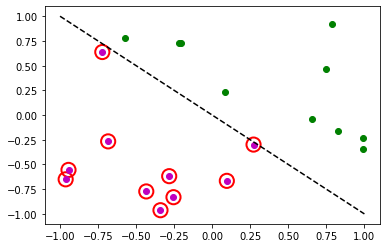

In [21]:
# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], 'go')
    else:
        plt.plot(x[0], x[1], 'mo')
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors='none', edgecolors='r', linewidths=2)
plt.plot([-1, 1], [1, -1], '--', color='black')
plt.show()

#### Good observable $(X, Z)$

Now, we have tested some observables to see how to improve the obtained score. For our example, we have achieved that the best observable is build by the Pauli matrix $X$ and $Z$:

In [23]:
# creating the quantum circuit
qcirc = QuantumCircuit(num_inputs)
qcirc.append(feature_map, range(num_inputs))
qcirc.append(ansatz, range(num_inputs))
#qcirc.draw('mpl')
qcirc_op = StateFn(qcirc)

H = StateFn(PauliSumOp.from_list([('X', 1.0), ('Z', 1.0)]))

final_op = ~H @ qcirc_op
#print(final_op)

In [24]:
# now, we will generate the neural network with all its components
# translating QuantumCircuit object to Operator object
print(qcirc_op)

# selecting the method to calculate the expectation value
exp_val = AerPauliExpectation()

# selecting the gradient to use
grad = Gradient()
#grad = NaturalGradient()

# defining the QuantumInstance
qi = QuantumInstance(Aer.get_backend('qasm_simulator'))

# defining the Quantum Neural Network
qnn = OpflowQNN(operator=final_op, input_params=feature_map.parameters, weight_params=ansatz.parameters, exp_val=exp_val, 
                gradient=grad, quantum_instance=qi)

# defining input and weights entries
qnn_input = X[0,:]
qnn_weights = np.random.rand(qnn.num_weights)

CircuitStateFn(
     ┌──────────────────────────┐»
q_0: ┤0                         ├»
     │  ZZFeatureMap(x[0],x[1]) │»
q_1: ┤1                         ├»
     └──────────────────────────┘»
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                         ├
«     │  TwoLocal(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15],θ[16],θ[17],θ[18],θ[19]) │
«q_1: ┤1                                                                                                                         ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘
)


In [25]:
# executing the neural network
qnn.forward(qnn_input, qnn_weights)

#qnn.backward(qnn_input, qnn_weights)

array([[0.35742214]])

In [26]:
# executing the neural network classifier
qnn_classifier = NeuralNetworkClassifier(qnn, one_hot=False, optimizer=COBYLA())

qnn_classifier.fit(X, y)

qnn_classifier.score(X, y)

0.95

In [27]:
# testing the data points, the same points are being used for trainning and testing
y_predict = qnn_classifier.predict(X)

# comparing the results
y_predict = y_predict.transpose().flatten()

for i in range(len(y)):
    if y_predict[i] == y[i]:
        print('Predicted correctly. Predicted is:', y_predict[i],'and test is:',y[i])
    else:
        print('Predicted uncorrectly. Predicted is:', y_predict[i],'and test is:',y[i])

Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: -1.0 and test is: -1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: -1.0 and test is: -1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: -1.0 and test is: -1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: -1.0 and test is: -1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: 1.0 and test is: 1
Predicted correctly. Predicted is: -1.0 and test is: -1
Predicted uncorrectly. Predicted is: -1.0 and test is: 1
Predicted correctly. Predicted is: -1.0 and test is: -1
Predicted correctly. Predicted is: -1.0 and test is: -1
Predicted correctly. Predicted is: -1.0 and test is: -1
Predicted

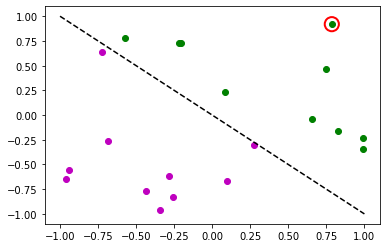

In [28]:
# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], 'go')
    else:
        plt.plot(x[0], x[1], 'mo')
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors='none', edgecolors='r', linewidths=2)
plt.plot([-1, 1], [1, -1], '--', color='black')
plt.show()

Here, to improve our results, we would choose an adequate feature map, ansatz and observable for our specific problem. This is a very hard task that requires to be studied in detail.

<div class="alert alert-block alert-success">
    <b>Conclusion:</b> Quantum Neural Networks are good models because they use hybrid approaches that will be executable in NISQ devices (<i>variational circuits</i>). The most important thing to obtain good results is the choice of the observable and parametrized ansatz, depending on the feature map. This will totally yield into a good or bad inference response of the model.
</div>

## 3. Quantum Neural Network Regression <a id='regression'></a> (It's your turn!)

The main goal of a Neural Network is to detect patterns into certain type of data describing an specific event, as said too many times previously.

Because of this, Quantum Neural Networks classify data, but they also make regression into the data.

Into this section, we are going to see an example of regression with a Quantum Neural Network. We are going to follow the same approach as in previously examples: feature map, ansatz and observable/operator.

The only thing it will change here is the use of `NeuralNetworkRegressor` from Qiskit instead of the class `NeuralNetworkClassifier`. The rest remains almost exactly the same.

One very important fact to keep in mind into the regression fact is **the correct selection of the parameter to be optmized**. For each type of function, a different parameter is being used and, therefore, will give optimal solutions or it could get into a barrens plateau.

Let's do an example of cosinus regression:

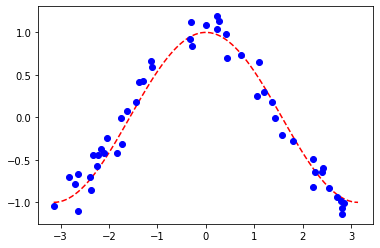

In [3]:
# Setup & your training samples

num_qubits = 1
num_samples = 50
eps = 0.25
low_bound, upper_bound = -np.pi, np.pi
X_ = np.linspace(low_bound, upper_bound, num=100).reshape(100, 1)
f = lambda x: np.cos(x)

X = (upper_bound - low_bound)*np.random.rand(num_samples, 1) + low_bound
y = f(X[:,0]) + eps*(2*np.random.rand(num_samples)-1)

plt.plot(X_, f(X_), 'r--')
plt.plot(X, y, 'bo')
plt.show()

### Generic OpflowQNN regression

In [4]:
# defining feature_map
param_x = Parameter('x')
feature_map = QuantumCircuit(1, name='fm')
feature_map.ry(param_x, 0)

# defining parametrized ansatz
ansatz =  # enter your code here

In [16]:
# defining the operator to use in the QNN

# first we create, as usual, the parametrized eigenstate of our solution (composed by feature_map and ansatz)

#you need to set qcirc = QuantumCircuit(num_qubits) and assing the featuremap and ansatz

# ---- Enter your code here ----


# ---- Enter your code here ----

qcirc_op = StateFn(qcirc)

# thus, we create the observable where we will 
H = StateFn(PauliSumOp.from_list([('Z', 1.0)]))

final_op = ~H @ qcirc_op
#print(final_op)

In [6]:
# defining QuantumInstance
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'))

# selecting the method to calculate the expectation value
exp_val = AerPauliExpectation()

# selecting the gradient to use
grad = Gradient()

# defining the QNN
qnn =  # enter your code here

In [7]:
# check the NeuralNetworkRegressor in qiskit tutorial
qnn_regressor = # enter your code here

In [8]:
qnn_regressor.fit(X, y)

qnn_regressor.score(X, y)

0.9633689629617227

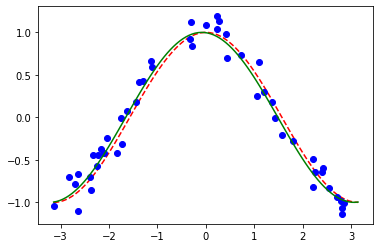

In [12]:
# evaluating the data points from all the spectra
y_ = qnn_regressor.predict(X_)

# plot of the target function
plt.plot(X_, f(X_), 'r--')

# plot of the data
plt.plot(X, y, 'bo')

# plotting the regresion line
plt.plot(X_, y_, 'g-')
plt.show()

### Specific *Variational Quantum Regressor* Qiskit function

The same as in the classification section, Qiskit allows us with a `VQR` encapsulated formula to develop the regression task of a Quantum Neural Network.

In [9]:
# defining feature_map
param_x = Parameter('x')
feature_map = QuantumCircuit(1, name='fm')
feature_map.rx(param_x, 0)

# defining parametrized ansatz
ansatz =  # enter your code here

# defining the QuantumInstance
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'))

In [10]:
# check VQR function in qiskit tutorial

vqr =  # enter your code here

/tmp/ipykernel_79/2217241618.py:1: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the estimator argument.
  vqr = VQR(feature_map=feature_map, ansatz=ansatz, optimizer=L_BFGS_B(), quantum_instance=quantum_instance)


In [11]:
# fitting the regressor
vqr.fit(X, y)

# looking at the score fitting
vqr.score(X, y)

0.9533067029632823

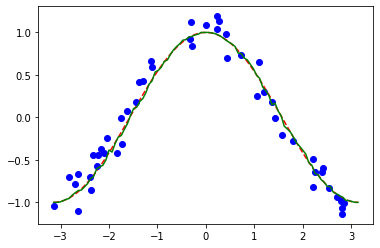

In [13]:
# evaluating the data from all the spectra
y_ = vqr.predict(X_)

# plot of the cosinus function
plt.plot(X_, f(X_), 'r--')

# plotting the data
plt.plot(X, y, 'bo')

# plot regression line
plt.plot(X_, y_, 'g-')
plt.show()

## Reference <a id='reference'></a>

https://qiskit.org/textbook/ch-machine-learning/machine-learning-qiskit-pytorch.html

https://www.ibm.com/cloud/learn/neural-networks

https://en.wikipedia.org/wiki/Neural_network

https://www.sas.com/en_us/insights/analytics/neural-networks.html

https://arxiv.org/pdf/1905.13311.pdf

https://qiskit.org/documentation/machine-learning/tutorials/01_neural_networks.html

https://qiskit.org/documentation/machine-learning/tutorials/02_neural_network_classifier_and_regressor.html

https://pennylane.ai/qml/glossary/quantum_gradient.html

https://pennylane.ai/qml/glossary/variational_circuit.html

# Additional information

<b>Created by:</b> Kuan-Cheng (Louis) Chen

<b>Co-work by:</b> Kian Jansepar, Michael Ho, Harsh Rathee

<b>Organised by:</b> Imperial College London Quantum Society (QTSoc)

(Official Website: https://imperialqtsoc.com/)

Version: 1.0

In [29]:
from qiskit.tools.jupyter import *
%qiskit_version_table